# Projeto Estatística I - Santander Coders Data Science

<pre>
Professor: Alex Lima
Alunos:    Bruno Henrique
           Fernanda Beatriz Dallaqua
           Natalia Brito
           Vinícius D' Lucas
</pre>           

# Sao Paulo housing prices

O dataset escolhido para este projeto foi o Sao Paulo housing prices, [disponível](https://www.kaggle.com/datasets/renatosn/sao-paulo-housing-prices/) na plataforma Kaggle.

-- descrição do dataset

talvez colocar uma imagem dos bairros/distritos de SP

In [1]:
# Importação das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df.head()

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11657 entries, 0 to 11656
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address   11657 non-null  object
 1   district  11657 non-null  object
 2   area      11657 non-null  int64 
 3   bedrooms  11657 non-null  int64 
 4   garage    11657 non-null  int64 
 5   type      11657 non-null  object
 6   rent      11657 non-null  int64 
 7   total     11657 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 728.7+ KB


In [4]:
print(f'Número de endereços únicos no dataset: {len(list(df["address"].unique()))}')
print(f'Número de bairros únicos no dataset: {len(list(df["district"].unique()))}')

Número de endereços únicos no dataset: 5348
Número de bairros únicos no dataset: 1199


### Quais são os top 15 bairros com mais imóveis no dataset?

In [5]:
df_bairros = df.groupby(['district'],as_index=False)['address'].count().sort_values(['address'],ascending=False)
df_bairros['Porcentagem'] = round(100 * df_bairros['address']/sum(df_bairros['address']),2)
df_bairros.head(15)

,district,address,Porcentagem
26,Bela Vista,352,3.02
982,Vila Mariana,232,1.99
384,Jardim Paulista,220,1.89
67,Centro,178,1.53
668,Pinheiros,159,1.36
131,Consolação,157,1.35
708,Santana,152,1.30
563,Mooca,147,1.26
709,Santo Amaro,146,1.25
43,Brás,141,1.21


Text(0.5, 0, 'Quantidade de imóveis')

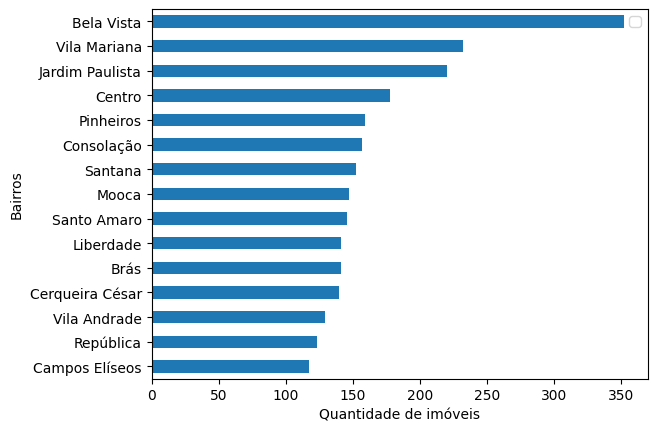

In [6]:
df_bairros.iloc[0:15].sort_values(by='address', ascending=True).plot.barh(x = 'district', y = 'address')
plt.ylabel('Bairros')
plt.legend([])
plt.xlabel('Quantidade de imóveis')

### Quantos são os tipos de imóveis pelo top 15 bairros com mais imóveis?

In [7]:
df_bairros_imoveis = df.groupby(['district','type'],as_index=False)['address'].count()
df_bairros_imoveis.head()
#como fazer sort pelos grupos? para ter quais são os tipos de imóveis pelos bairros com mais imóveis?

,district,type,address
0,Aclimação,Apartamento,39
1,Aclimação,Casa,9
2,Aclimação,Studio e kitnet,2
3,Adalgisa,Apartamento,2
4,Adalgisa,Casa,2


### Quantos imóveis de cada tipo o dataset possui?

In [8]:
print('Quais são os tipos de imóveis?')
print(list(df['type'].unique()))

Quais são os tipos de imóveis?
['Studio e kitnet', 'Apartamento', 'Casa em condomínio', 'Casa']


In [9]:
df_imoveis = df.groupby('type',as_index=False)['address'].count()
df_imoveis['Porcentagem'] = round(100*df_imoveis['address']/sum(df_imoveis['address']),2)
df_imoveis.sort_values('Porcentagem',ascending=False,inplace=True)
df_imoveis.head()

,type,address,Porcentagem
0,Apartamento,7194,61.71
1,Casa,2841,24.37
3,Studio e kitnet,1381,11.85
2,Casa em condomínio,241,2.07


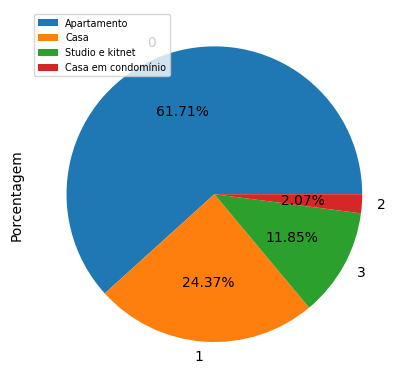

In [10]:
ax = df_imoveis.plot(y='Porcentagem', x='type', kind='pie',autopct='%1.2f%%')
ax.legend(['Apartamento', 'Casa', 'Studio e kitnet', 'Casa em condomínio'], loc = 'upper left', fontsize = 'x-small')


# Qual é a distribuição dos aluguéis?

Text(0.5, 0, 'Valor do aluguel')

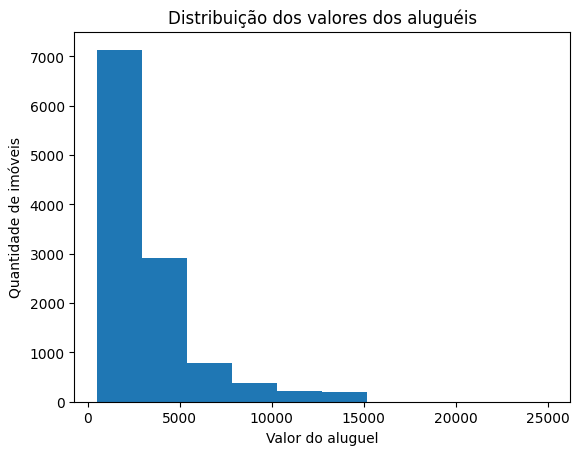

In [11]:
plt.hist(df['rent'], bins = 10)
plt.title('Distribuição dos valores dos aluguéis')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Valor do aluguel')

In [12]:
df.sort_values(['rent'],ascending=False)

,address,district,area,bedrooms,garage,type,rent,total
6095,Avenida Chibarás,Planalto Paulista,24,1,0,Studio e kitnet,25000,26710
9720,Rua Luís Martins,Alto da Lapa,200,3,4,Apartamento,15000,19160
11546,Alameda Campinas,Alphaville,340,4,6,Casa em condomínio,15000,17190
10358,Rua Professor Nova Gomes,Vila Madalena,260,4,2,Casa,15000,15900
8767,Rua Cataguaz,Vila Congonhas,328,4,4,Apartamento,15000,22750
...,...,...,...,...,...,...,...,...
6428,Rua Eugênia S Vitale,Taboão,30,1,0,Studio e kitnet,500,594
7420,Rua Manuel José Rodrigues,Sacoma,20,1,0,Casa,500,521
1188,Viela Renaldo Laporta,Vila Aurora (zona Norte),30,1,0,Casa,500,521
51,Rua Tanque Velho,Vila Nivi,45,1,0,Casa,500,551


In [13]:
df[['area','bedrooms','garage','rent','total']].describe()

,area,bedrooms,garage,rent,total
count,11657.000000,11657.000000,11657.000000,11657.000000,11657.000000
mean,84.655658,1.966286,1.060393,3250.814789,4080.030625
std,74.020536,0.931313,1.132349,2650.711557,3352.480274
min,0.000000,0.000000,0.000000,500.000000,509.000000
25%,40.000000,1.000000,0.000000,1590.000000,1996.000000
50%,60.000000,2.000000,1.000000,2415.000000,3057.000000
75%,96.000000,3.000000,2.000000,3800.000000,4774.000000
max,580.000000,6.000000,6.000000,25000.000000,28700.000000


### Quais as médias de aluguéis do top 15 bairros com mais imóveis?

In [14]:
df_bairros_alugueis = df.groupby('district', as_index=False).agg(
                       media_rent=pd.NamedAgg(column='rent',aggfunc='mean'),
                       num_imoveis=pd.NamedAgg(column='rent',aggfunc='count')
                      ).sort_values(['num_imoveis','media_rent'],ascending=[False,False])
df_bairros_alugueis.head(15)

,district,media_rent,num_imoveis
26,Bela Vista,2671.352273,352
982,Vila Mariana,3996.043103,232
384,Jardim Paulista,6305.963636,220
67,Centro,2171.539326,178
668,Pinheiros,4709.981132,159
131,Consolação,4160.184713,157
708,Santana,3121.993421,152
563,Mooca,3317.687075,147
709,Santo Amaro,5149.308219,146
43,Brás,1992.659574,141


### E para bairros com mais de 50 imóveis, qual o top 15 de médias de aluguéis mais caros?

In [15]:
df_bairros_alugueis_caros = df.groupby('district', as_index=False).agg(
                       media_rent=pd.NamedAgg(column='rent',aggfunc='mean'),
                       num_imoveis=pd.NamedAgg(column='rent',aggfunc='count')
                      ).sort_values('media_rent',ascending=False)
df_bairros_alugueis_caros = df_bairros_alugueis_caros[df_bairros_alugueis_caros['num_imoveis']>=50]
df_bairros_alugueis_caros.head(15)

,district,media_rent,num_imoveis
73,Cerqueira César,6750.657143,140
384,Jardim Paulista,6305.963636,220
584,Paraíso,6285.561798,89
1026,Vila Nova Conceição,6246.766234,77
163,Itaim Bibi,6105.294118,51
52,Campo Belo,5704.842593,108
1140,Vila Suzana,5241.008772,114
709,Santo Amaro,5149.308219,146
1037,Vila Olímpia,5086.919540,87
668,Pinheiros,4709.981132,159


# Qual a distribuição da quantidade de quartos por imóvel?

Text(0.5, 0, 'Quantidade de quartos')

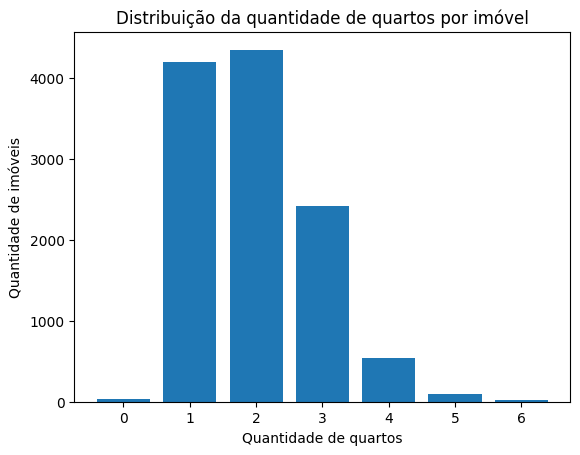

In [16]:
plt.bar(df['bedrooms'].value_counts().sort_index().index, height = df['bedrooms'].value_counts().sort_index().values)
plt.title('Distribuição da quantidade de quartos por imóvel')
plt.ylabel('Quantidade de imóveis')
plt.xlabel('Quantidade de quartos')

# Distribuição da área dos imóveis

Text(0.5, 0, 'Área')

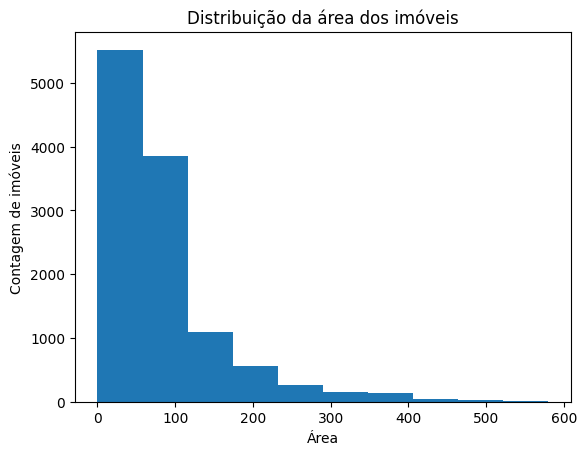

In [17]:
plt.hist(df['area'])
plt.title('Distribuição da área dos imóveis')
plt.ylabel('Contagem de imóveis')
plt.xlabel('Área')

# Tendências

c:\Users\INTEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


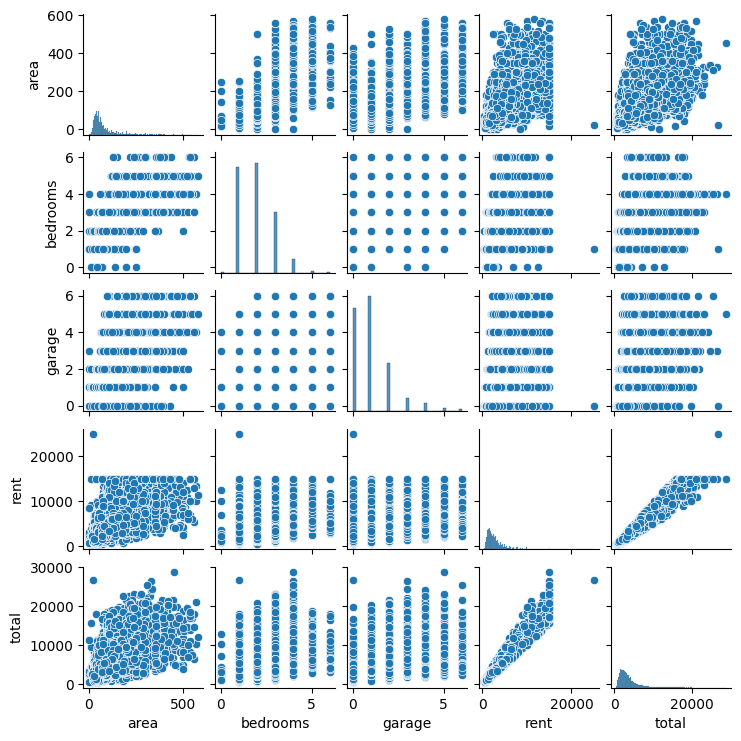

In [18]:
import seaborn as sns
sns.pairplot(df, height = 1.5)

# Análises para cada bairro (top 3/5 mais imóveis)

In [19]:
def analise_bairro(dataframe, bairro):
    df_bairro = df[df['district']==bairro]
    print(df_bairro[['area','bedrooms','garage','rent','total']].describe())
    

In [20]:
top1 = df_bairros.iloc[0]['district']
print(f'Análise bairro {top1}:')
analise_bairro(df,top1)

Análise bairro Bela Vista:
             area    bedrooms      garage          rent         total
count  352.000000  352.000000  352.000000    352.000000    352.000000
mean    49.468750    1.275568    0.400568   2671.352273   3372.315341
std     35.712992    0.555393    0.540444   1708.871489   1950.392632
min     11.000000    0.000000    0.000000    504.000000    556.000000
25%     32.000000    1.000000    0.000000   1648.500000   2134.750000
50%     40.000000    1.000000    0.000000   2200.000000   2983.500000
75%     55.000000    1.000000    1.000000   3127.500000   3911.750000
max    360.000000    4.000000    2.000000  14110.000000  16390.000000


In [21]:
top2 = df_bairros.iloc[1]['district']
print(f'Análise bairro {top2}:')
analise_bairro(df,top2)

Análise bairro Vila Mariana:
             area    bedrooms      garage          rent         total
count  232.000000  232.000000  232.000000    232.000000    232.000000
mean    75.112069    1.823276    0.797414   3996.043103   5058.362069
std     59.259247    0.970906    0.891223   2351.306846   2973.559240
min     15.000000    1.000000    0.000000    600.000000    638.000000
25%     32.000000    1.000000    0.000000   2500.000000   3225.500000
50%     60.000000    2.000000    1.000000   3225.000000   4042.500000
75%     95.250000    2.250000    1.000000   4625.000000   5821.000000
max    370.000000    6.000000    4.000000  15000.000000  20810.000000


In [22]:
top3 = df_bairros.iloc[2]['district']
print(f'Análise bairro {top3}:')
analise_bairro(df,top3)

Análise bairro Jardim Paulista:
             area    bedrooms      garage          rent         total
count  220.000000  220.000000  220.000000    220.000000    220.000000
mean   105.581818    2.122727    1.195455   6305.963636   8545.718182
std     70.385550    0.945275    0.795522   3628.553740   4814.678147
min     25.000000    1.000000    0.000000   1600.000000   2044.000000
25%     49.250000    1.000000    1.000000   3462.000000   4843.750000
50%     90.000000    2.000000    1.000000   5000.000000   6818.000000
75%    140.000000    3.000000    2.000000   9056.250000  12132.500000
max    383.000000    5.000000    5.000000  15000.000000  22990.000000


In [23]:
df

,address,district,area,bedrooms,garage,type,rent,total
0,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
1,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
2,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
3,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
4,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
...,...,...,...,...,...,...,...,...
11652,Avenida Adolfo Pinheiro,Santo Amaro,94,2,1,Apartamento,4100,5778
11653,Rua Professor Alexandre Correia,Jardim Vitória Régia,350,4,4,Apartamento,11250,17480
11654,Rua Abílio Borin,Jardim Caravelas,84,1,2,Apartamento,4500,5467
11655,Rua Forte William,Jardim Fonte do Morumbi,76,1,0,Apartamento,9000,10200


## Regressão Logistica

Regressão a fim de tentar estimar qual o tipo de imóvel com base nas informações da dataset

Disclaimers:

- Não está sendo aplicado fine-tuning no modelo
- Considerar desbalanceamento de classe

In [59]:
#Regressão Logistica - Baseline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score


In [70]:

df_rg = df.copy() #Copia do df

#Instancia do enconder
encoder = LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')

#Enconding do target
df_rg['type'] = encoder.fit_transform(df_rg['type'])

#Separar target e features
X = df_rg[['area','bedrooms','garage','rent','district']]
y = df_rg['type']

#Train e test split
X = enc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instancia do modelo
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

c:\Users\INTEL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [72]:
#Métricas de avaliação

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy:.2f}')

print('AUC Score : ',roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr'))


Acurácia: 0.76
AUC Score :  0.8455897088331292
